In [1]:
%matplotlib notebook
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text', usetex=True)

># Analysis Code for the Edge Illumination Method:   

TRADUCIR

En las siguientes líneas de código se encuentran los recursos necesarios para leer los archivos .raw y así obtener los archivos .txt. En la segunda parte de este código se encuentra el análisis estadístico asociado a las imágenes anteriormente interpretadas, con la inclusión de la normalización mediante un _Flat Field_ y el posterior análisis de la recuperación de fase.

> **Código para lectura de los Raw:**

Esta primera sección abarca los códigos empleados para la lectura de los archivos .raw. Cada archivo se asume ha sido almacenado con el prefijo "Frame", para simplificar los procesos.

In [2]:
"""
/// Generación de las imágenes a partir de los archivos .raw. TRADUCIR
"""

def Matrix_Creator(Raw, Pixels):
    """
    Esta función genera una lista con un par de matrices que representan las dos imágenes que surgen al
    analizar el archivo .raw.
    """
    image_pair = []
    for k in range(0, len(Raw), Pixels*Pixels):
        blank = np.zeros((Pixels, Pixels))
        for i in range(Pixels):
            for j in range(Pixels):
                blank[i, j] = Raw[j + Pixels*i + k]
        image_pair.append(blank)
    return image_pair

def Data_Import(path, prefix, Pixels, NRaw):
    """
    Esta función se encarga de tomar la información de la ubicación de la carpeta con los archivos .raw
    y crear las matrices de números asociadas a cada una de las tomas de datos.
    
    Inputs:
        path: Directorio de la carpeta donde están los (.raw).
        prefix: General name used by each (.raw).
        Pixels: Cantidad de píxeles de la matriz del detector.
        NRaw: Cantidad de imágenes .raw a analizar.
    
    Output:
        data: Lista con los pares de matrices de intensidad de cada .raw.
    """
    data = []
    for i in range(1, NRaw + 1):
        Raw = np.fromfile(path + "{}{}.raw".format(prefix, i), dtype='float32')
        matrix = Matrix_Creator(Raw, Pixels)
        data.append(matrix)
    
    try:
        Raw = np.fromfile(path + "{}FF.raw".format(prefix), dtype='float32')
        matrix = Matrix_Creator(Raw, Pixels)
        data.append(matrix)
        print("1. A Flat Field has been found.")
    except FileNotFoundError:
        print("1. There is no Flat Field in this set.")
        None
        
    return data

def Image_Generator(data, N_images, N_Dopple):
    """
    Esta función genera una lista con las matrices asociadas a cada imágen tomada. Se hace promediando
    las dos matrices de cada .raw para tener la intensidad media.
    
    Inputs:
        data: Lista con cada par de matrices asociado a los .raw que se analizaron.
        N_images: Cantidad de imágenes que se generarán.
        N_Dopple: Cantidad de imágenes por archivo .raw (no sabemos si varía).
    
    Output:
        images: Lista con las matrices asociadas a cada imagen analizada.
    """
    images = [] 
    for i in range(0, N_images):
        mean = 0
        for j in range(0, N_Dopple):
            mean += data[i][j]
        mean = mean/N_Dopple
        images.append(mean)
        
    if len(data) > N_images:
        mean_ff = 0
        for j in range(0, N_Dopple):
            mean_ff += data[-1][j]
        mean_ff = mean_ff/N_Dopple
        images.append(mean_ff)
        print("2. A Flat Field has been found.")
    else:
        print("2. There is no Flat Field in this set.")
        
    return images

"""
/// Creación de los histogramas de comparación entre píxeles pares e impares.
"""

def Intensity_Mean(image, Pixels):
    intensity = np.zeros(Pixels)
    for i in range(0, Pixels):
        intensity += image[i, 0:Pixels]
    mean = intensity/np.max(intensity)
    return mean


def Aver(name,X1,X2,Step):
    P=np.copy(name)
    for i in range(len(P)):
        P[i,X1:X2]=(1/2)*(P[i,X1-Step:X2-Step]+P[i,X1+Step:X2+Step])
    return P

In [3]:
Pixels = 256 # Cantidad de Píxeles del Detector.
N_Raws = 4 # Cantidad de imágenes a analizar (ingresar un valor >= 2).
N_Dopple = 3 # El archivo .raw genera dos imágenes, este número indica eso para promediarlas.
path_raw = "raw\\" # Directorio donde están los Raw.
path_txt = "txt\\" # Directorio donde se ponen los Txt.

In [4]:
prefix = "Frame_"

In [5]:
brute_material = Data_Import(path_raw, prefix, Pixels, N_Raws)
images = Image_Generator(brute_material, N_Raws, N_Dopple)

FileNotFoundError: [Errno 2] No such file or directory: 'raw\\Frame_1.raw'

In [6]:
for i in range(1, N_Raws + 1):
    try:
        np.savetxt(path_txt + "{}{}.txt".format(prefix, i), images[i - 1])
    except IndexError:
        break
        
if len(brute_material) > N_Raws:
    np.savetxt(path_txt + "{}_FF.txt".format(prefix), images[N_Raws])
    print("3. A Flat Field has been saved.")
else:
    print("3. There is no Flat Field to save.")

NameError: name 'images' is not defined

In [45]:
piece = "legacy_\\100um"
data_1 = Data_Import(path_raw + piece + "\\1\\", "Piece_", 256, 2)
images_1 = Image_Generator(data_1, 2, 2)
image_1 = images_1[0] + images_1[1]

1. There is no Flat Field in this set.
2. There is no Flat Field in this set.


In [46]:
data_2 = Data_Import(path_raw + piece + "\\2\\", "Piece_", 256, 2)
images_2 = Image_Generator(data_2, 2, 2)
image_2 = images_2[0] + images_2[1]

1. There is no Flat Field in this set.
2. There is no Flat Field in this set.


In [47]:
data_3 = Data_Import(path_raw + piece + "\\3\\", "Piece_", 256, 2)
images_3 = Image_Generator(data_3, 2, 2)
image_3 = images_3[0] + images_3[1]

1. There is no Flat Field in this set.
2. There is no Flat Field in this set.


In [48]:
data_4 = Data_Import(path_raw + piece + "\\4\\", "Piece_", 256, 2)
images_4 = Image_Generator(data_4, 2, 2)
image_4 = images_4[0] + images_4[1]

1. There is no Flat Field in this set.
2. There is no Flat Field in this set.


In [49]:
images = [image_1, image_2, image_3, image_4]

> **Visualización previa:**

A continuación se puede observar el mapa de intensidades asociado a la imagen $k$-ésima de la lista images. Si el conjunto de imágenes incluye el Flat Field, se debe de colocar el valor de $k$ igual a $-1$ (último item de la lista). El mapa mostrado **no está normalizado**.

<IPython.core.display.Javascript object>


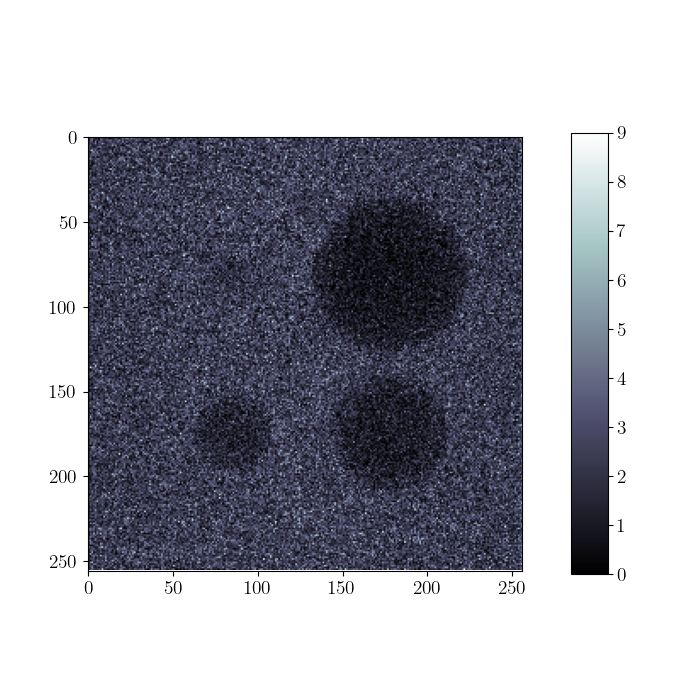

In [50]:
k = 0
fig, ax = plt.subplots(figsize=(7, 7))
map_ = ax.imshow(image_1, cmap = "bone")
fig.colorbar(map_, ax =ax , location='right', anchor=(0.5, 0.5), shrink=0.82, aspect=12)

En este apartado se logra apreciar la curva asociada a las intensidades de cada columna de píxeles, estando estos valores normalizados.

<IPython.core.display.Javascript object>


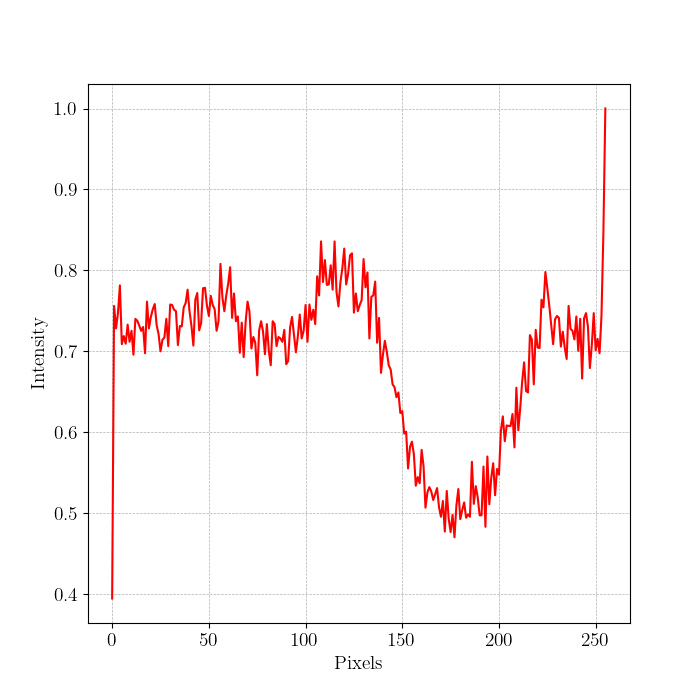

In [51]:
fig, ax = plt.subplots(figsize=(7, 7))
intensities = Intensity_Mean(images[k], Pixels)
ax.plot(intensities, '-', color="red")
ax.set_xlabel("Pixels", fontsize = 14)
ax.set_ylabel("Intensity", fontsize = 14)
ax.grid(linestyle = '--', linewidth = 0.5)

> **Histograma de Intensidades:**

Este histograma permite conocer la distribución de intensidades entre los píxeles pares e impares. Para poder determinar qué tan óptimo es el step seleccionado, ambos histogramas deben estár lo más superpuestos posible.

<IPython.core.display.Javascript object>


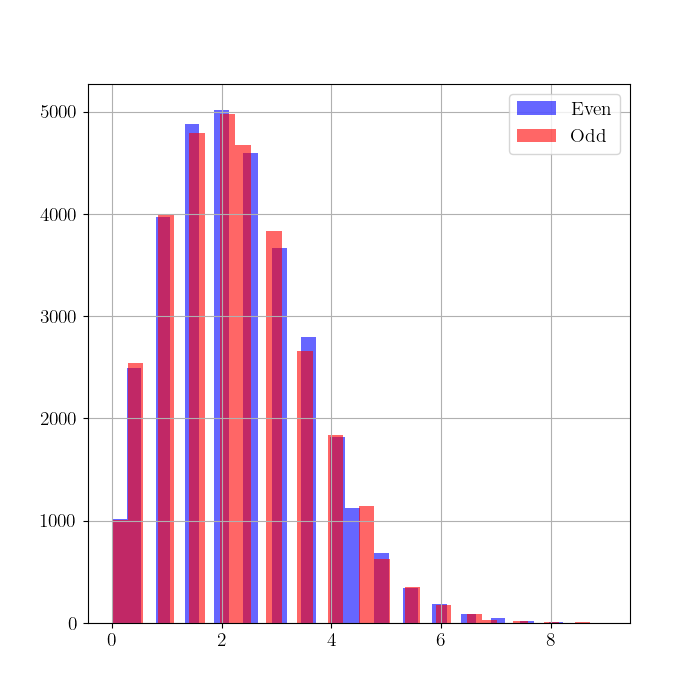

In [52]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.grid(True)

even_pixels = images[k][:,::2]
odd_pixels = images[k][:,1::2]
even_ = np.ravel(even_pixels)
odd_ = np.ravel(odd_pixels)

bin_size = 32
GNMe =ax.hist(even_, bins = bin_size, color="blue", label="Even", alpha=0.6)
GNMo =ax.hist(odd_, bins = bin_size, color="red", label="Odd", alpha=0.6)
# ax.set_title("Step {}".format(), fontsize=16)
ax.legend()

> **Normalización:**

Una vez leídos y guardados los archivos .raw, se reescriben de forma tal que los valores se encuentren normalizados en función del Flat Field recolectado.

In [53]:
for i in range(1, N_Raws + 1):
    try:
        Frame = np.loadtxt(path_txt + "{}{}.txt".format(prefix, i))  # Carga las imágenes tomadas.
        # FrameFF = np.loadtxt(path_txt + "{}{}.txt".format(prefix, "FF"))  # Carga la imagen del Flat Field.
    except Exception as e:
        print(f"Error al cargar los archivos: {e}")
        sys.exit()

    # Realizar la división evitando división por cero
    # N_Frame = np.divide(Frame, FrameFF, out = np.zeros_like(Frame), where = FrameFF != 0)
    np.savetxt(path_txt + "Norm\\{}{}.txt".format(prefix, i), Frame, fmt = "%.6f")  

> **Código para la suma de las imágenes:**

In [54]:
z_FS = 0.6 # Distancia Fuente - Objeto
z_SD = 1.2 # Distancia Objeto - Detector
z_FD = z_FS + z_SD # Distancia Fuente - Detector
M = z_FD/z_FS # Magnificación
E_J = 20 #keV
h=6.63*10**(-34)
c=3*(10**(8))
k=(2*np.pi*E_J)/(h*c)
o = k/z_SD

# Todos estos parámetros están aún por ser determinados en su significado.
a =  31.6*(10**(-6)) # Tamaño de apertura de la máscara.

In [55]:
txt_images = []
for i in range(1, N_Raws + 1):
    image = np.genfromtxt(path_txt + "{}{}.txt".format(prefix, i))
    txt_images.append(image)

In [56]:
txt_images = [image_1, image_2, image_3, image_4]

In [57]:
output = np.zeros((256, 260), dtype=np.float32)  # Usamos float para promediar

for i in range(260):
    columns = []  # columnas que vamos a promediar
    if i < 256:
        columns.append(txt_images[0][:, i])
    if 0 <= i - 1 < 256:
        columns.append(txt_images[1][:, i - 1])
    if 0 <= i - 2 < 256:
        columns.append(txt_images[2][:, i - 2])
    if 0 <= i - 3 < 256:
        columns.append(txt_images[3][:, i - 3])

    # Promediamos solo las columnas disponibles
    output[:, i] = np.mean(columns, axis=0)

In [87]:
Odd_Maps = []
Even_Maps =[]
Absor_Maps = []
Phase_Maps = []

for i in range(0, N_Raws): 
    odd = txt_images[i][:,1::2] 
    even = txt_images[i][:,::2]
    
    absor = (txt_images[i][:,::2] + txt_images[i][:,1::2])/2
    p_num = txt_images[i][:,1::2] - txt_images[i][:,::2]
    d_num = txt_images[i][:,1::2] + txt_images[i][:,::2]
    phase  = (M*a*o/2)*np.divide(p_num, d_num, out = np.ones_like(p_num), where = d_num != 0)
    
    Odd_Maps.append(odd)
    Even_Maps.append(even)
    Absor_Maps.append(absor)
    Phase_Maps.append(phase)

In [88]:
Sep = int(Pixels/2)
Odd_Dith = np.zeros((Pixels, N_Raws*Sep))
Even_Dith = np.zeros((Pixels, N_Raws*Sep))
Absor_Dith = np.zeros((Pixels, N_Raws*Sep))
Phase_Dith = np.zeros((Pixels, N_Raws*Sep))

for i in range(0, N_Raws):
    for j in range(0, int(Pixels/2)):
        Odd_Dith[:, N_Raws*j + i:N_Raws*j + i + 1] = Odd_Maps[N_Raws - 1 - i][:,j:j + 1]
        Even_Dith[:, N_Raws*j + i:N_Raws*j + i + 1] = Even_Maps[N_Raws - 1 - i][:,j:j + 1]
        Absor_Dith[:, N_Raws*j + i:N_Raws*j + i + 1] = Absor_Maps[N_Raws - 1 - i][:,j:j + 1]
        Phase_Dith[:, N_Raws*j + i:N_Raws*j + i + 1] = Phase_Maps[N_Raws - 1 - i][:,j:j + 1]

Factor = Odd_Dith.shape[1]/Odd_Dith.shape[0]

Odd = zoom(Odd_Dith, (Factor, 1))
Even = zoom(Even_Dith, (Factor, 1))
Absor= zoom(Absor_Dith, (Factor, 1))
Phase = zoom(Phase_Dith, (Factor, 1))

Total = (Even + Odd)/np.max(Even + Odd)

print(Total.shape)

I_Absor = Intensity_Mean(Absor, Absor.shape[0])
I_Phase = Intensity_Mean(Phase, Phase.shape[0])
I_Total = Intensity_Mean(Total, Total.shape[0])


(512, 512)


<IPython.core.display.Javascript object>


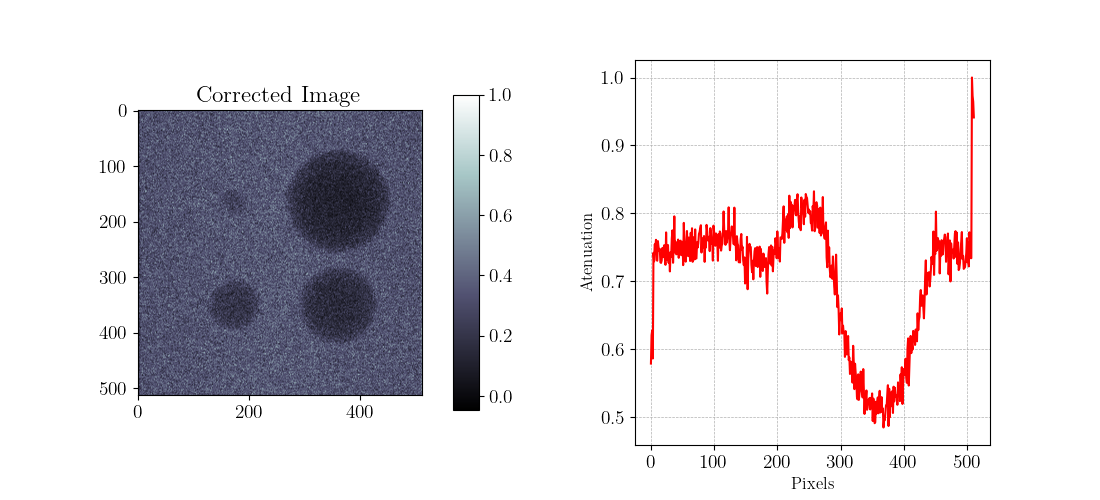

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
plt.subplots_adjust(wspace = 0.4)

ax[0].set_title("Corrected Image")
im = ax[0].imshow(Total, cmap="bone")
fig.colorbar(im, ax = ax[0], location = 'right', anchor = (0.5, 0.5), shrink = 0.82, aspect = 12)

ax[1].plot(I_Total, '-', color = "red")
ax[1].set_xlabel("Pixels", fontsize = 12)
ax[1].set_ylabel("Atenuation", fontsize = 12)
ax[1].grid(linestyle = '--', linewidth = 0.5)

<IPython.core.display.Javascript object>


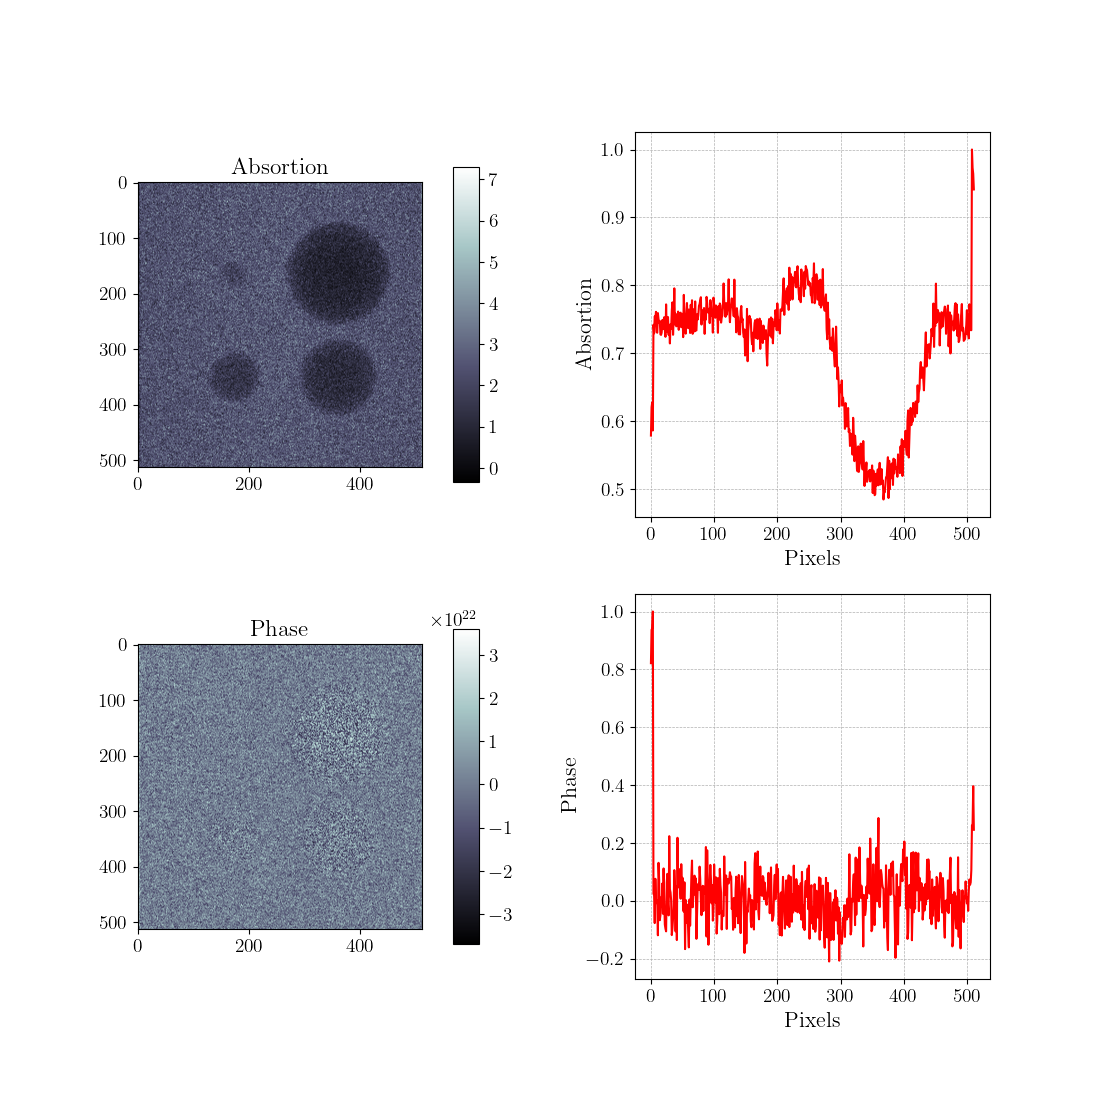

In [90]:
fig, ax = plt.subplots(2, 2, figsize=(11, 11))
plt.subplots_adjust(wspace = 0.4)

ax[0, 0].set_title("Absortion")
im = ax[0, 0].imshow(Absor, cmap="bone")
fig.colorbar(im, ax = ax[0, 0], location = 'right', anchor=(0.5, 0.5), shrink = 0.82, aspect = 12)

ax[1, 0].set_title("Phase")
im_ = ax[1, 0].imshow(Phase, cmap="bone")
fig.colorbar(im_, ax = ax[1, 0], location = 'right', anchor=(0.5, 0.5), shrink = 0.82, aspect = 12)

ax[0, 1].plot(I_Absor, '-', color = "red")
ax[0, 1].set_xlabel("Pixels", fontsize = 16)
ax[0, 1].set_ylabel("Absortion", fontsize = 16)
ax[0, 1].grid(linestyle = '--', linewidth = 0.5)

ax[1, 1].plot(I_Phase, '-', color = "red")
ax[1, 1].set_xlabel("Pixels", fontsize = 16)
ax[1, 1].set_ylabel("Phase", fontsize = 16)
ax[1, 1].grid(linestyle = '--', linewidth = 0.5)

<IPython.core.display.Javascript object>


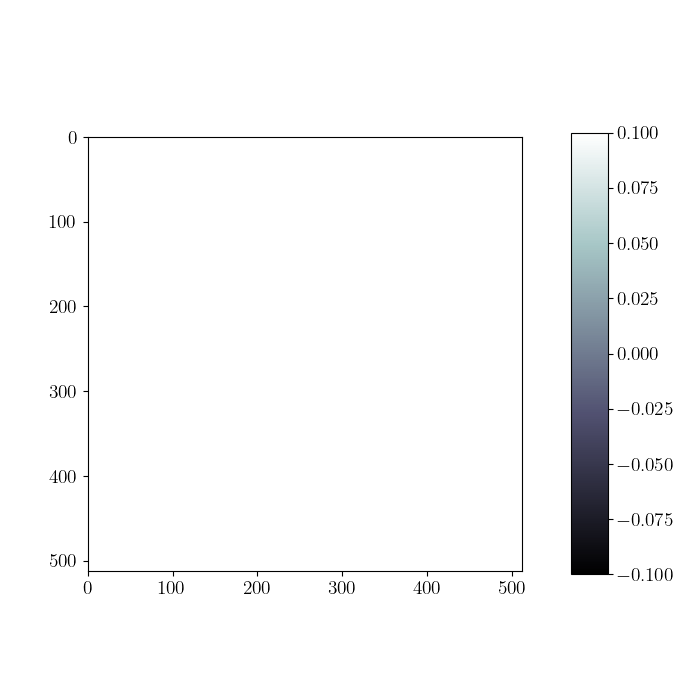

In [80]:
fig, ax = plt.subplots(figsize=(7, 7))
map_ = ax.imshow(Phase, cmap = "bone")
fig.colorbar(map_, ax =ax , location='right', anchor=(0.5, 0.5), shrink=0.82, aspect=12)

In [265]:
# SNR y CNR para la región de interes (ROI)

#BGx_bounds es una lista de un rango x_min a x_max donde se encuentre una sección del fondo (BackGound) (BG)
#BGx_bounds es una lista de un rango y_min a y_max donde se encuentre una sección del fondo (BackGound) (BG)

BGx_bounds, BGy_bounds = [0, 55], [0, 55]


#ROIx_bounds es una lista de listas de un rango x_min a x_max donde se encuentra el ROI correspondiente
#ROIy_bounds es una lista de listas de un rango y_min a y_max donde se encuentra el ROI correspondiente

ROIx_bounds, ROIy_bounds = [[246, 452], [112, 220], [295,435]], [[74,250], [112, 220], [277, 414]]

def SNR(image, ROI_num, ROIx_bounds, ROIy_bounds, BGx_bounds, BGy_bounds):

    SNR_ROIs = []

    roi_bg = image[BGy_bounds[0]:BGy_bounds[1], BGx_bounds[0]:BGx_bounds[1]]
    mean_bg = np.mean(roi_bg)
    std_bg = np.std(roi_bg)

    for i in range(ROI_num):

        roi = image[ROIy_bounds[i][0]:ROIy_bounds[i][1],
                          ROIx_bounds[i][0]:ROIx_bounds[i][1]]
        mean_roi = np.mean(roi)

        snr = np.abs(mean_roi - mean_bg) / std_bg
        SNR_ROIs.append(snr)
    
    return SNR_ROIs

def CNR(image, ROI_num, ROIx_bounds, ROIy_bounds, BGx_bounds, BGy_bounds):

    CNR_ROIs = []

    roi_bg = image[BGy_bounds[0]:BGy_bounds[1], BGx_bounds[0]:BGx_bounds[1]]
    mean_bg = np.mean(roi_bg)
    std_bg = np.std(roi_bg)

    for i in range(ROI_num):

        roi = image[ROIy_bounds[i][0]:ROIy_bounds[i][1],
                          ROIx_bounds[i][0]:ROIx_bounds[i][1]]
        mean_roi = np.mean(roi)
        std_roi = np.std(roi)

        cnr = np.abs(mean_roi - mean_bg) / np.sqrt(std_roi**2 + std_bg**2)
        CNR_ROIs.append(cnr)
    
    return CNR_ROIs

In [229]:
CNR(Total, 3, ROIx_bounds, ROIy_bounds, BGx_bounds, BGy_bounds)

[0.6338597048496449, 0.11015092796061642, 0.571260726738763]

In [230]:
SNR(Total, 3, ROIx_bounds, ROIy_bounds, BGx_bounds, BGy_bounds)

[0.9783717320494852, 0.16045341779818267, 0.8429012413863479]